# Split digits

The goal is to split the input image into separated digits that will be then used as input for the network.

In [1]:
import Segmentation as seg
from PIL import Image, ImageDraw, ImageColor, ImageEnhance, ImageFilter

In [2]:
straight = "img-202114-215724.png"
diagonal = "img-202114-215659.png"

image_path = diagonal

original_img = Image.open(image_path)

segmentation = seg.GraphBasedSegmentation(image_path)
segmentation.segment(
                k=4500
                , min_size=100
                , preprocessing=True
                # , contrast=1.2
                , gaussian_blur=2.3)
segmentation.generate_image()
segmentation.draw_boxes()

Building graph...
Graph built in 0.895s.

Segmenting...
Segmentation done in 1.29s.

Removing componentes having size less than 100...
Removed components in 0.388s.

Defining regions...
Regions defined in 0.0368s.

Generating image...
Image generated in 0.151s.

Searching boundaries...
Boundaries found in 0.865s.

Drawing boxes...
Boxes drawn in 0.000629s.



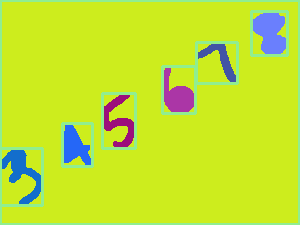

In [3]:
segmentation.boxed_img

In [4]:
def __regions_area(boundaries):
    """ Compute the area of each region.

    Returns:
        areas (dict of ints): dictionary containing, for each region, its area
    """
    areas = {}
    for region, extremes in boundaries.items():
        A = extremes['max_row'] - extremes['min_row']
        B = extremes['max_col'] - extremes['min_col']
        area = A * B
        areas[region] = area
    return areas

In [5]:
boundaries = segmentation.boundaries.copy()

areas = __regions_area(segmentation.boundaries)

# removing background
boundaries[max(areas, key=lambda k: areas[k])] = None

# removing regions with area equal to zero
boundaries.update((k, v) if areas[k] != 0 else (k, None) for k, v in boundaries.items())

segm = segmentation.preprocessed_arr.copy()

boundaries

{0: None,
 1: {'min_row': 11, 'max_row': 55, 'min_col': 251, 'max_col': 287},
 2: {'min_row': 123, 'max_row': 166, 'min_col': 62, 'max_col': 92},
 3: {'min_row': 42, 'max_row': 83, 'min_col': 196, 'max_col': 237},
 4: {'min_row': 148, 'max_row': 205, 'min_col': 0, 'max_col': 42},
 5: {'min_row': 93, 'max_row': 148, 'min_col': 102, 'max_col': 135},
 6: {'min_row': 66, 'max_row': 113, 'min_col': 162, 'max_col': 195},
 7: None,
 8: None}

In [6]:
digits = {}
counter = 0
for _, extremes in boundaries.items():
    if extremes is None:
        continue
    a = extremes['min_row']
    b = extremes['max_row'] + 1
    c = extremes['min_col']
    d = extremes['max_col'] + 1
    digits[counter] = segm[a:b,c:d].copy()
    counter += 1

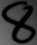

In [7]:
q = digits[0].copy()
im = Image.fromarray(q)
im

In [8]:
import numpy as np
im_arr = np.array(im)

# threshold = lambda el: np.uint8(el) if el < 120 else np.uint8(255)
# vfunc = np.vectorize(threshold)
# im_arr_thresh = vfunc(im_arr)
threshold = lambda el, t: np.uint8(el) if el < t else np.uint8(255)
vfunc = np.vectorize(threshold)
im_arr_thresh = vfunc(im_arr, 50)

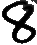

In [9]:
im_post = Image.fromarray(im_arr_thresh)
im_post

In [10]:
height, width = im_arr_thresh.shape

import math

if height > width:
    diff = height - width

    left_cols_num = math.ceil((diff) / 2)
    right_cols_num = diff - left_cols_num

    # im_resize = np.pad(im_arr_thresh, ((0,0),(right_cols_num, left_cols_num)), 'constant', constant_values=(np.uint8(255),np.uint8(255)))
    im_resize = np.pad(im_arr_thresh, ((0,0),(right_cols_num, left_cols_num)), 'maximum')


In [11]:
im_resize_im = Image.fromarray(im_resize)

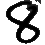

In [12]:
im_resize_im